In [1]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: auto inline plots
%matplotlib inline

# For better plot style
sns.set(style="darkgrid")

# Widen display for Pandas DataFrames
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 120)


In [2]:
import os
import pandas as pd

# List your downloaded months
months = ['october', 'november', 'december', 'january', 'february', 'march', 'april']
dfs = []

for month in months:
    file_path = os.path.join('..', 'data', f'games_{month}.csv')
    df = pd.read_csv(file_path)
    dfs.append(df)

# Combine all into one DataFrame
all_games = pd.concat(dfs, ignore_index=True)

# Clean column names
all_games.columns = [col.lower().strip().replace(' ', '_').replace('.', '') for col in all_games.columns]

# Drop unnamed and mostly empty columns
all_games = all_games.loc[:, ~all_games.columns.str.contains('^unnamed', case=False)]
all_games = all_games.drop(columns=['notes'], errors='ignore')

# Rename confusing columns
all_games = all_games.rename(columns={
    'pts': 'visitor_pts',
    'pts1': 'home_pts',
    'visitor/neutral': 'visitor_team',
    'home/neutral': 'home_team'
})

# Strip whitespace from team names
all_games['visitor_team'] = all_games['visitor_team'].str.strip()
all_games['home_team'] = all_games['home_team'].str.strip()

# Display all games
pd.set_option('display.max_rows', None)
all_games


,date,start_(et),visitor_team,visitor_pts,home_team,home_pts,attend,log,arena
0,Tue Oct 22 2024,7:30p,New York Knicks,109,Boston Celtics,132,19156,2:04,TD Garden
1,Tue Oct 22 2024,10:00p,Minnesota Timberwolves,103,Los Angeles Lakers,110,18997,2:26,Crypto.com Arena
2,Wed Oct 23 2024,7:00p,Indiana Pacers,115,Detroit Pistons,109,20062,2:23,Little Caesars Arena
3,Wed Oct 23 2024,7:30p,Brooklyn Nets,116,Atlanta Hawks,120,17548,2:33,State Farm Arena
4,Wed Oct 23 2024,7:30p,Orlando Magic,116,Miami Heat,97,19630,2:31,Kaseya Center
5,Wed Oct 23 2024,7:30p,Milwaukee Bucks,124,Philadelphia 76ers,109,19754,2:28,Wells Fargo Center
6,Wed Oct 23 2024,7:30p,Cleveland Cavaliers,136,Toronto Raptors,106,19800,2:18,Scotiabank Arena
7,Wed Oct 23 2024,8:00p,Charlotte Hornets,110,Houston Rockets,105,18055,2:20,Toyota Center
8,Wed Oct 23 2024,8:00p,Chicago Bulls,111,New Orleans Pelicans,123,18581,2:11,Smoothie King Center
9,Wed Oct 23 2024,9:00p,Memphis Grizzlies,126,Utah Jazz,124,18175,2:33,Delta Center


In [3]:
# Use actual score columns
all_games['visitor_pts'] = pd.to_numeric(all_games['visitor_pts'], errors='coerce')
all_games['home_pts'] = pd.to_numeric(all_games['home_pts'], errors='coerce')

# Drop rows where scores are missing
all_games = all_games.dropna(subset=['visitor_pts', 'home_pts'])

# Define clutch games: games decided by 5 points or fewer
all_games['point_diff'] = (all_games['visitor_pts'] - all_games['home_pts']).abs()
clutch_games = all_games[all_games['point_diff'] <= 5].copy()

# Determine winner
clutch_games['winner'] = clutch_games.apply(
    lambda row: 'Visitor' if row['visitor_pts'] > row['home_pts'] else 'Home',
    axis=1
)

# Show result of all cltuch games 
clutch_games[['date', 'visitor_team', 'visitor_pts', 'home_team', 'home_pts', 'point_diff', 'winner']]


,date,visitor_team,visitor_pts,home_team,home_pts,point_diff,winner
3,Wed Oct 23 2024,Brooklyn Nets,116,Atlanta Hawks,120,4,Home
7,Wed Oct 23 2024,Charlotte Hornets,110,Houston Rockets,105,5,Visitor
9,Wed Oct 23 2024,Memphis Grizzlies,126,Utah Jazz,124,2,Visitor
10,Wed Oct 23 2024,Phoenix Suns,116,Los Angeles Clippers,113,3,Visitor
14,Thu Oct 24 2024,Minnesota Timberwolves,117,Sacramento Kings,115,2,Visitor
18,Fri Oct 25 2024,Charlotte Hornets,120,Atlanta Hawks,125,5,Home
25,Fri Oct 25 2024,New Orleans Pelicans,105,Portland Trail Blazers,103,2,Visitor
26,Sat Oct 26 2024,Los Angeles Clippers,109,Denver Nuggets,104,5,Visitor
33,Sat Oct 26 2024,Houston Rockets,106,San Antonio Spurs,109,3,Home
35,Sat Oct 26 2024,Sacramento Kings,127,Los Angeles Lakers,131,4,Home


In [4]:
# Count home and away clutch games
from collections import defaultdict
import pandas as pd

# Ensure all rows will be displayed in the output
pd.set_option('display.max_rows', None)

# Collect stats
team_stats = defaultdict(lambda: {'home_wins': 0, 'home_games': 0, 'away_wins': 0, 'away_games': 0})

for _, row in clutch_games.iterrows():
    home_team = row['home_team']
    visitor_team = row['visitor_team']
    winner = row['winner']
    
    # Home team updates
    team_stats[home_team]['home_games'] += 1
    if winner == 'Home':
        team_stats[home_team]['home_wins'] += 1
    
    # Away team updates
    team_stats[visitor_team]['away_games'] += 1
    if winner == 'Visitor':
        team_stats[visitor_team]['away_wins'] += 1

# Build DataFrame
team_perf = pd.DataFrame([
    {
        'team': team,
        'home_clutch_wins': stats['home_wins'],
        'home_clutch_games': stats['home_games'],
        'home_win_pct': round(stats['home_wins'] / stats['home_games'] * 100, 2) if stats['home_games'] > 0 else None,
        'away_clutch_wins': stats['away_wins'],
        'away_clutch_games': stats['away_games'],
        'away_win_pct': round(stats['away_wins'] / stats['away_games'] * 100, 2) if stats['away_games'] > 0 else None,
    }
    for team, stats in team_stats.items()
])

# Add clutch win %
team_perf['clutch_win_pct'] = round(
    (team_perf['home_clutch_wins'] + team_perf['away_clutch_wins']) /
    (team_perf['home_clutch_games'] + team_perf['away_clutch_games']) * 100, 2
)

# Sort by clutch win %
team_perf_sorted = team_perf.sort_values(by='clutch_win_pct', ascending=False)

# Display all rows
display(team_perf_sorted)


,team,home_clutch_wins,home_clutch_games,home_win_pct,away_clutch_wins,away_clutch_games,away_win_pct,clutch_win_pct
18,Washington Wizards,3,7,42.86,7,7,100.00,71.43
26,New York Knicks,5,9,55.56,9,12,75.00,66.67
15,Indiana Pacers,9,12,75.00,4,8,50.00,65.00
10,Portland Trail Blazers,6,9,66.67,4,7,57.14,62.50
23,Cleveland Cavaliers,7,9,77.78,4,9,44.44,61.11
2,Houston Rockets,7,11,63.64,8,14,57.14,60.00
20,Chicago Bulls,5,10,50.00,5,7,71.43,58.82
12,Denver Nuggets,6,13,46.15,8,11,72.73,58.33
0,Atlanta Hawks,7,12,58.33,7,12,58.33,58.33
17,Orlando Magic,8,14,57.14,4,7,57.14,57.14


In [18]:
team_perf.to_csv("team_perf.csv", index=False)

In [17]:
# Drop existing 'overall_win_pct' if it already exists
if 'overall_win_pct' in team_perf.columns:
    team_perf.drop(columns='overall_win_pct', inplace=True)

# Compute overall season win % for each team from all games (not just clutch)
team_wins = defaultdict(lambda: {'wins': 0, 'games': 0})

for _, row in all_games.iterrows():
    home_team = row['home_team']
    visitor_team = row['visitor_team']
    home_pts = row['home_pts']
    visitor_pts = row['visitor_pts']
    
    # Skip if scores are missing
    if pd.isna(home_pts) or pd.isna(visitor_pts):
        continue

    # Update games played
    team_wins[home_team]['games'] += 1
    team_wins[visitor_team]['games'] += 1

    # Update win counts
    if home_pts > visitor_pts:
        team_wins[home_team]['wins'] += 1
    else:
        team_wins[visitor_team]['wins'] += 1

# Create a DataFrame with season win %
season_perf = pd.DataFrame([
    {
        'team': team,
        'season_win_pct': round(stats['wins'] / stats['games'] * 100, 2)
    }
    for team, stats in team_wins.items()
])

# Merge full season win % into clutch performance DataFrame
team_perf = team_perf.merge(season_perf, on='team')

# Rename for clarity
team_perf.rename(columns={'season_win_pct': 'overall_win_pct'}, inplace=True)

# Confirm no duplicate column names
assert team_perf.columns.duplicated().sum() == 0, "Duplicate column names still exist!"

# Display result
display(team_perf[['team', 'overall_win_pct', 'clutch_win_pct']])


,team,overall_win_pct,clutch_win_pct
0,Atlanta Hawks,47.62,58.33
1,Brooklyn Nets,31.71,44.44
2,Houston Rockets,62.07,60.00
3,Charlotte Hornets,23.17,51.85
4,Utah Jazz,20.73,25.00
5,Memphis Grizzlies,55.68,44.00
6,Los Angeles Clippers,59.77,52.00
7,Phoenix Suns,43.90,52.63
8,Sacramento Kings,48.19,42.31
9,Minnesota Timberwolves,60.92,51.85


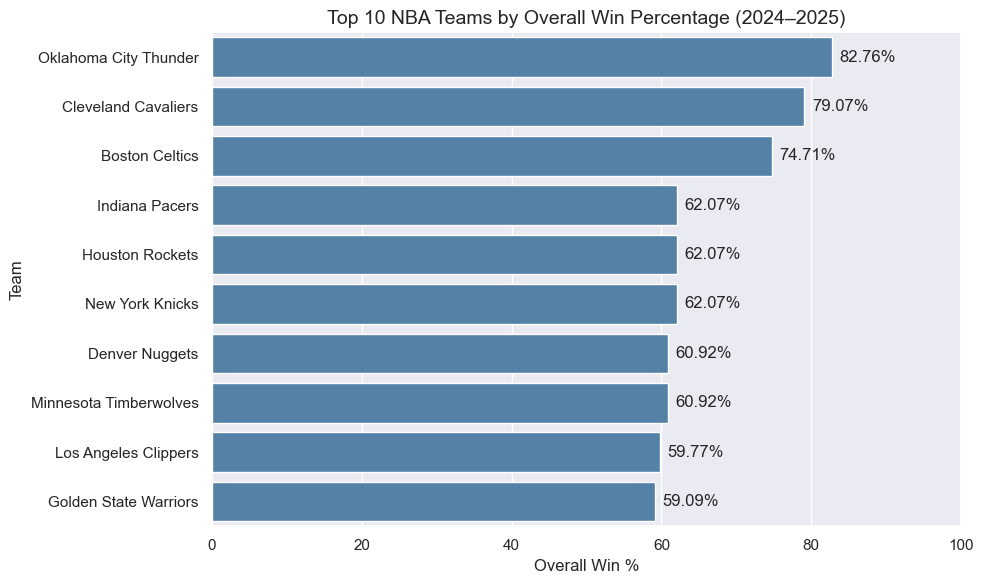

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort top 10 teams by overall win %
top10 = team_perf.sort_values(by='overall_win_pct', ascending=False).head(10)

# Set figure size
plt.figure(figsize=(10, 6))

# Clean horizontal bar plot
ax = sns.barplot(
    data=top10,
    y='team',
    x='overall_win_pct',
    color='steelblue'
)

# Annotate bars with win percentage
for i, row in top10.iterrows():
    ax.text(
        row['overall_win_pct'] + 1,        # move text slightly right
        top10.index.get_loc(i),            # y-position by order
        f"{row['overall_win_pct']}%",
        va='center'
    )

# Set titles and axis labels
plt.title('Top 10 NBA Teams by Overall Win Percentage (2024–2025)', fontsize=14)
plt.xlabel('Overall Win %')
plt.ylabel('Team')
plt.xlim(0, 100)

plt.tight_layout()
plt.show()


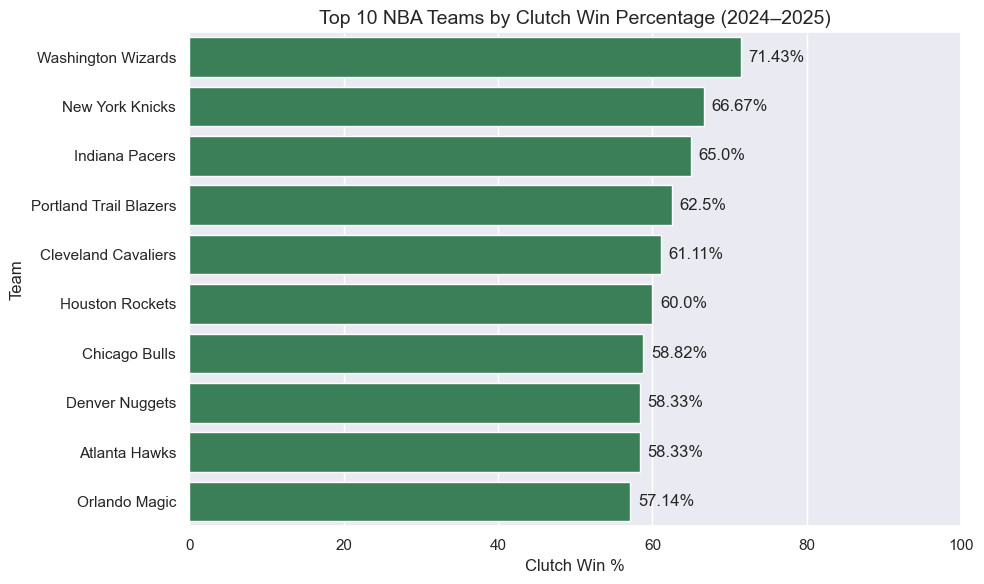

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort top 10 teams by clutch win %
top10_clutch = team_perf.sort_values(by='clutch_win_pct', ascending=False).head(10)

# Set figure size
plt.figure(figsize=(10, 6))

# Horizontal bar plot
ax = sns.barplot(
    data=top10_clutch,
    y='team',
    x='clutch_win_pct',
    color='seagreen'
)

# Annotate bars with clutch win %
for i, row in top10_clutch.iterrows():
    ax.text(
        row['clutch_win_pct'] + 1,
        top10_clutch.index.get_loc(i),
        f"{row['clutch_win_pct']}%",
        va='center'
    )

# Set titles and axis labels
plt.title('Top 10 NBA Teams by Clutch Win Percentage (2024–2025)', fontsize=14)
plt.xlabel('Clutch Win %')
plt.ylabel('Team')
plt.xlim(0, 100)

plt.tight_layout()
plt.show()


In [10]:
import sys
!{sys.executable} -m pip install scipy


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
# Inspect the first few values
print("Sample values:\n", team_perf[['overall_win_pct', 'clutch_win_pct']].head(10))

# Check if the two columns are identical
matches = (team_perf['overall_win_pct'] == team_perf['clutch_win_pct']).sum()
total = len(team_perf)
print(f"\nIdentical values count: {matches} / {total}")

# Check number of unique values
print("\nUnique value counts:")
print("Overall Win %:", team_perf['overall_win_pct'].nunique())
print("Clutch Win %:", team_perf['clutch_win_pct'].nunique())

# Check how far off the two columns are
residuals = team_perf['clutch_win_pct'] - team_perf['overall_win_pct']
print("\nResidual stats (clutch - overall):")
print(residuals.describe())
print("\nResidual sample:")
print(residuals.head(10))


Sample values:
    overall_win_pct  clutch_win_pct
0            47.62           58.33
1            31.71           44.44
2            62.07           60.00
3            23.17           51.85
4            20.73           25.00
5            55.68           44.00
6            59.77           52.00
7            43.90           52.63
8            48.19           42.31
9            60.92           51.85

Identical values count: 0 / 30

Unique value counts:
Overall Win %: 25
Clutch Win %: 28

Residual stats (clutch - overall):
count    30.000000
mean      0.750667
std      16.273341
min     -39.900000
25%      -8.310000
50%       0.375000
75%       8.617500
max      49.480000
dtype: float64

Residual sample:
0    10.71
1    12.73
2    -2.07
3    28.68
4     4.27
5   -11.68
6    -7.77
7     8.73
8    -5.88
9    -9.07
dtype: float64


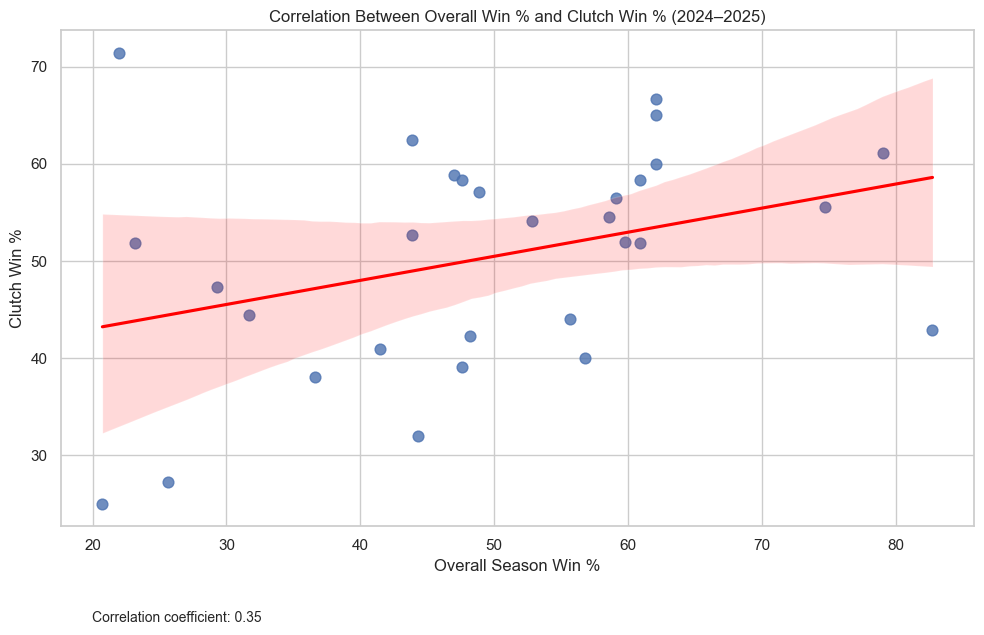

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Calculate clutch win percentage
team_perf['clutch_win_pct'] = round(
    (team_perf['home_clutch_wins'] + team_perf['away_clutch_wins']) /
    (team_perf['home_clutch_games'] + team_perf['away_clutch_games']) * 100, 2
)

# Create the plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Scatter + regression line
sns.regplot(
    x=team_perf['overall_win_pct'],
    y=team_perf['clutch_win_pct'],
    scatter_kws={'s': 60},
    line_kws={'color': 'red'},
)

# Calculate correlation
correlation, _ = pearsonr(team_perf['overall_win_pct'], team_perf['clutch_win_pct'])

# Titles and labels
plt.title('Correlation Between Overall Win % and Clutch Win % (2024–2025)')
plt.xlabel('Overall Season Win %')
plt.ylabel('Clutch Win %')
plt.tight_layout()

# Display correlation coefficient
plt.figtext(0.1, -0.05, f'Correlation coefficient: {correlation:.2f}', fontsize=10)
plt.show()

In [13]:
from collections import defaultdict
import pandas as pd

# Track home games and home wins
home_stats = defaultdict(lambda: {'wins': 0, 'games': 0})

for _, row in all_games.iterrows():
    home_team = row['home_team']
    home_pts = row['home_pts']
    visitor_pts = row['visitor_pts']
    
    # Skip missing scores
    if pd.isna(home_pts) or pd.isna(visitor_pts):
        continue

    # Count home game
    home_stats[home_team]['games'] += 1

    # Count home win
    if home_pts > visitor_pts:
        home_stats[home_team]['wins'] += 1

# Convert to DataFrame
home_perf = pd.DataFrame([
    {
        'team': team,
        'home_win_pct': round(stats['wins'] / stats['games'] * 100, 2)
    }
    for team, stats in home_stats.items()
])


In [14]:
# Remove any duplicate columns first
if 'home_win_pct' in team_perf.columns:
    team_perf.drop(columns='home_win_pct', inplace=True)

# Merge in home win %
team_perf = team_perf.merge(home_perf, on='team')


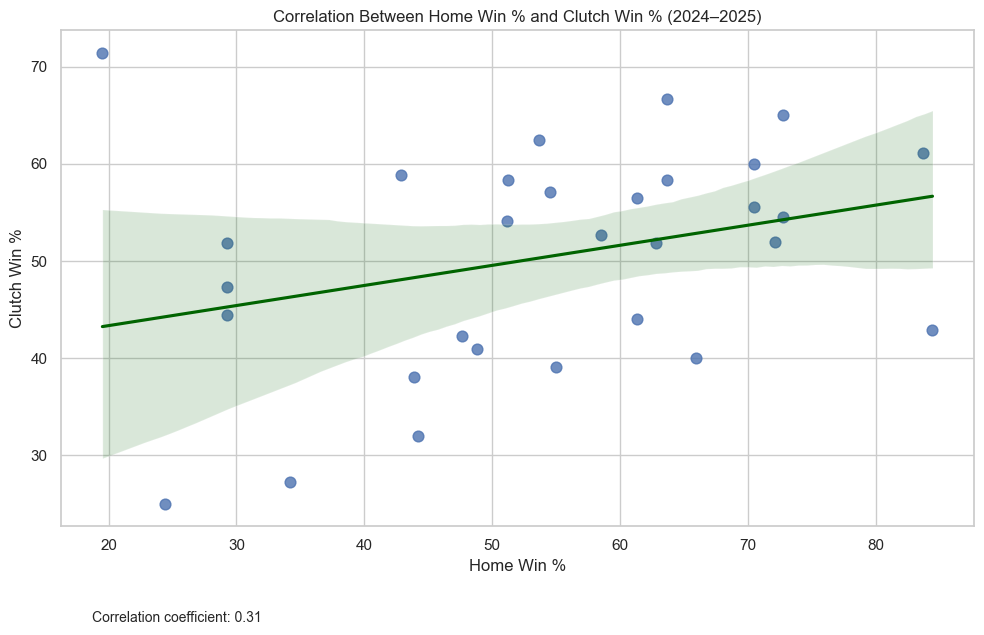

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

sns.regplot(
    x=team_perf['home_win_pct'],
    y=team_perf['clutch_win_pct'],
    scatter_kws={'s': 60},
    line_kws={'color': 'darkgreen'},
)

# Correlation
correlation, _ = pearsonr(team_perf['home_win_pct'], team_perf['clutch_win_pct'])

plt.title('Correlation Between Home Win % and Clutch Win % (2024–2025)')
plt.xlabel('Home Win %')
plt.ylabel('Clutch Win %')
plt.figtext(0.1, -0.05, f'Correlation coefficient: {correlation:.2f}', fontsize=10)
plt.tight_layout()
plt.show()
